## matplotlib

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## plt.plot()

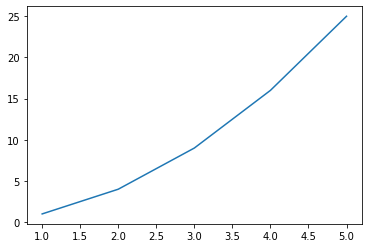

In [3]:
x = [1, 2, 3, 4, 5]
y = np.array(x)**2
plt.plot(x, y)

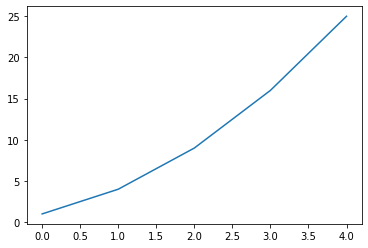

In [4]:
plt.plot(y)

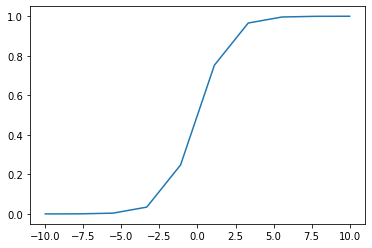

In [5]:
x = np.linspace(-10, 10, 10)
z = 1/(1 + np.exp(-x))
plt.plot(x, z)

In [6]:
df = pd.DataFrame({'a': [1, 2, 3, 4, 5, 6],
                  'b': [10, 15, 40, 100, 200, 400]})

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Second argument 'b' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  """Entry point for launching an IPython kernel.


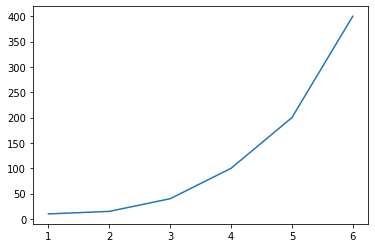

In [7]:
plt.plot('a', 'b', data=df)

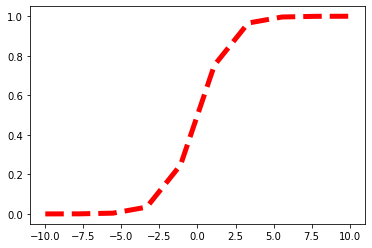

In [8]:
plt.plot(x, z, 'r--', linewidth=5)

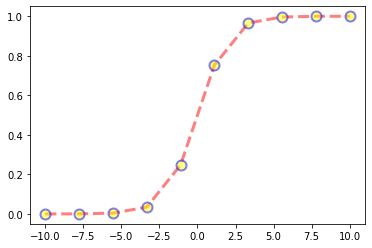

In [9]:
# color : グラフの線の色　⇨　’red’や’green’のように色の名前を指定します．’r’や’g’のように頭文字でもOKです．
# lw (line width) : 線の太さ　⇨　数字です．好みの大きさにしてください
# ls (line style) : 線の種類　⇨　’-‘や’--‘のように指定します．よく使うのはこの二つのどちらかです．
# marker : マーカーの種類　⇨　’o’や’x’ように指定します．マーカーの形が変わります．
# markersize : マーカーの大きさ　⇨　数字です．好みの大きさにしてください
# markerfacecolor : マーカーの色　⇨　’red’や’green’のように色の名前を指定します．’r’や’g’のように頭文字でもOKです．
# markeredgecolor : マーカーの枠に色　⇨　’red’や’green’のように色の名前を指定します．’r’や’g’のように頭文字でもOKです．
# markeredgewidth : マーカーの枠の太さ　⇨　数字です．好みの大きさにしてください
# alpha : plotの透明度　⇨　0から1の間をfloatで指定します．0に近い程透明度が上がります．
plt.plot(x, z,
         color='red',
         lw=3, ls='--',
         marker='o',
         markersize=10,
         markerfacecolor='yellow',
         markeredgecolor='blue',
         markeredgewidth=2,
         alpha=0.5)

##  付属情報を付ける

([<matplotlib.axis.YTick at 0x7fd45fbe2350>,
 <a list of 3 Text yticklabel objects>)

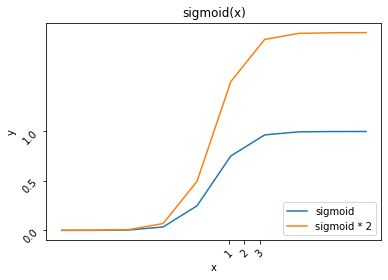

In [10]:
plt.plot(x, z, label='sigmoid')
plt.plot(x, z*2, label='sigmoid * 2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('sigmoid(x)')
plt.legend(loc=4)
plt.xticks([1, 2, 3], rotation=45)
plt.yticks([0, 0.5, 1], rotation=45)

## EXCISE

In [11]:
df = pd.read_csv('tmdb_5000_movies.csv')
df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [12]:
# csvファイルを読み込み
df = pd.read_csv('tmdb_5000_movies.csv')
# release_dateがNANのレコードをフィルタアウト
df = df[~(df['release_date'].isna())]
# year項目作成
df['year'] = df['release_date'].apply(lambda x: int(x[:4]))
df['year']

0       2009
1       2007
2       2015
3       2012
4       2012
        ... 
4798    1992
4799    2011
4800    2013
4801    2012
4802    2005
Name: year, Length: 4802, dtype: int64

Text(0, 0.5, 'count')

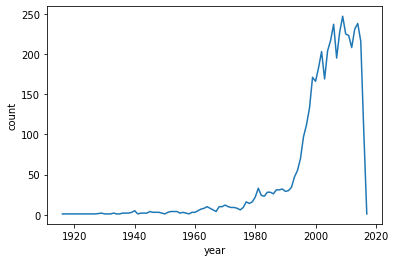

In [13]:
plt.plot(df.groupby('year').count()['id'])
plt.xlabel('year')
plt.ylabel('count')

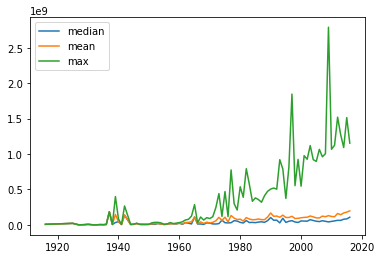

In [14]:
# revenue推移
df =df[df['revenue']!=0]
plt.plot(df.groupby('year').median()['revenue'], label='median')
plt.plot(df.groupby('year').mean()['revenue'], label='mean')
plt.plot(df.groupby('year')['revenue'].max(), label='max')
plt.legend()

## 複数のグラフを描画する

### plt.subplot(nrows, ncols, index)

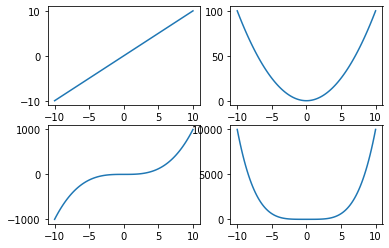

In [15]:
x = np.linspace(-10, 10, 100)
plt.subplot(2, 2, 1)
plt.plot(x, x**1)
plt.subplot(2, 2, 2)
plt.plot(x, x**2)
plt.subplot(2, 2, 3)
plt.plot(x, x**3)
plt.subplot(2, 2, 4)
plt.plot(x, x**4)

### plt.figureオブジェクト

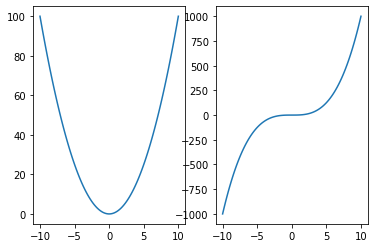

In [16]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.plot(x, x**2)
ax2.plot(x, x**3)

### fig, axes = plt.subplots(nrows=1, ncols=2)

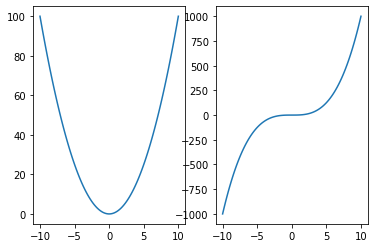

In [17]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(x, x**2)
axes[1].plot(x, x**3)

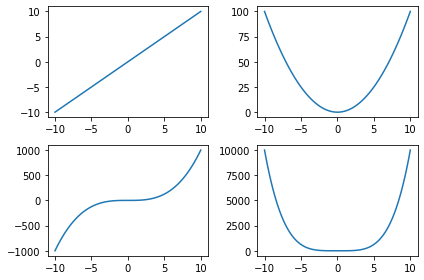

In [18]:
fig, axes = plt.subplots(2, 2)
axes[0, 0].plot(x, x**1)
axes[0, 1].plot(x, x**2)
axes[1, 0].plot(x, x**3)
axes[1, 1].plot(x, x**4)
fig.tight_layout()

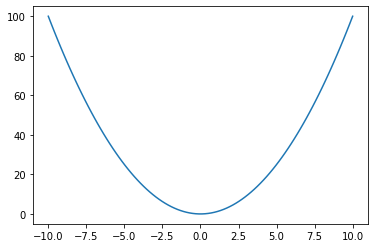

In [19]:
fig, axes = plt.subplots(1, 1)
axes.plot(x, x**2)

(-11.0, 11.0, -1100.0, 1100.0)

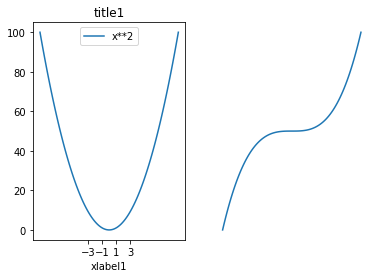

In [20]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(x, x**2, label='x**2')
axes[1].plot(x, x**3)
axes[0].set_xlabel('xlabel1')
axes[0].set_title('title1')
axes[0].set_xticks([-3, -1, 1, 3])
axes[0].legend()
axes[1].axis('off')

## plt.scatter()

In [21]:
df = pd.read_csv('tmdb_5000_movies.csv')

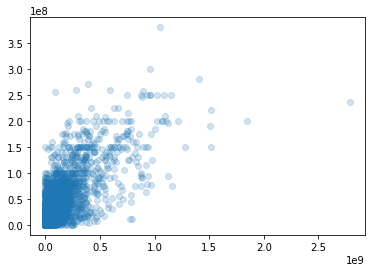

In [22]:
plt.scatter(df['revenue'], df['budget'], alpha=0.2)

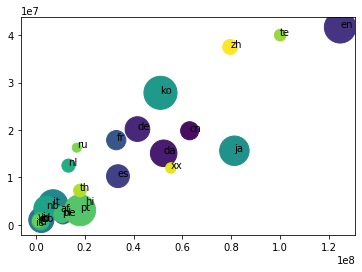

In [23]:
df = df[(df['revenue'] != 0) & (df['budget'] != 0)]
lang_group_df = df.groupby('original_language').mean()[['budget', 'revenue', 'vote_count']]
c = np.arange(len(lang_group_df))
plt.scatter('revenue', 'budget', s='vote_count', c=c, data=lang_group_df)
for idx, row in lang_group_df.iterrows():
    plt.annotate(idx, (row['revenue'], row['budget']))

In [24]:
c = np.arange(len(lang_group_df))
c

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

## plt.hist()

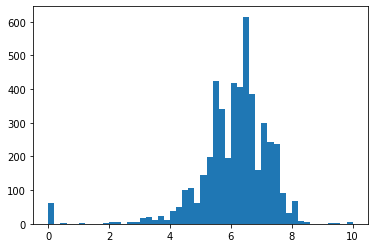

In [25]:
df = pd.read_csv('tmdb_5000_movies.csv')
plt.hist(df['vote_average'], bins=50)
plt.show()

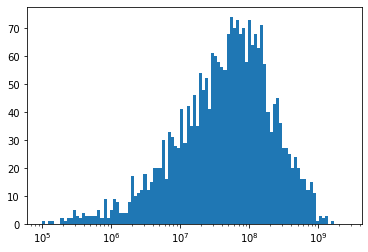

In [26]:
fig, axes = plt.subplots()
df = df[(df['revenue'] != 0) & (df['budget'] != 0)]
df['prlfit'] = df.apply(lambda row: row['revenue'] - row['budget'], axis=1)
log_bins = np.logspace(5,np.log10(df['prlfit'].max()) , 100)
axes.hist(df['prlfit'], bins=log_bins)
axes.set_xscale('log')

In [27]:
bins = np.logspace(0,np.log10(df['prlfit'].max()) , 100)

## plt.bar()

<BarContainer object of 3 artists>

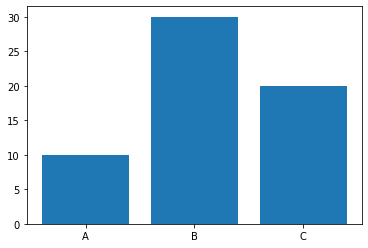

In [28]:
df = pd.DataFrame({'categorical':['A', 'B', 'C'], 'val':[10, 30, 20]})
plt.bar('categorical', 'val', data=df)

<BarContainer object of 3 artists>

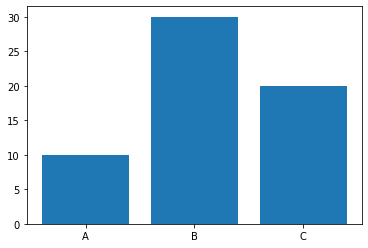

In [29]:
plt.bar(df['categorical'], df['val'])

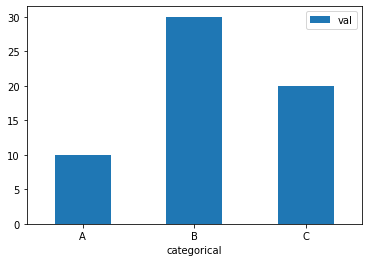

In [30]:
df.plot('categorical', 'val', kind='bar', rot=0)

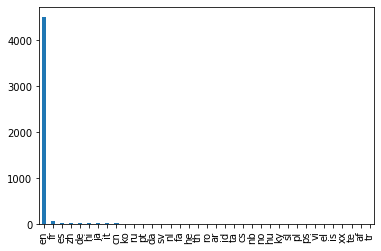

In [31]:
df = pd.read_csv('tmdb_5000_movies.csv')
df['original_language'].value_counts().plot(kind='bar')

## plt.boxplot()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd45f0f5950>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd45f106d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd45f111cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd45f106210>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd45f114c90>],
 'means': []}

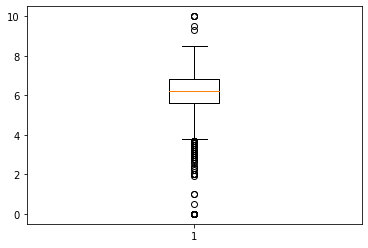

In [32]:
plt.boxplot(df['vote_average'])

## figsize引数でplotのサイズを指定

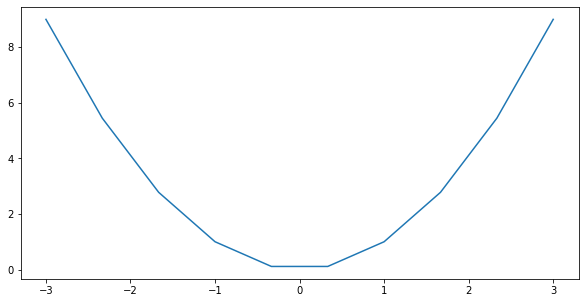

In [33]:
x = np.linspace(-3, 3, 10)
# figsize=(width, height)をinchスケールで,dpiでdots per inchを指定
plt.figure(figsize=(10, 5))
plt.plot(x, x**2)

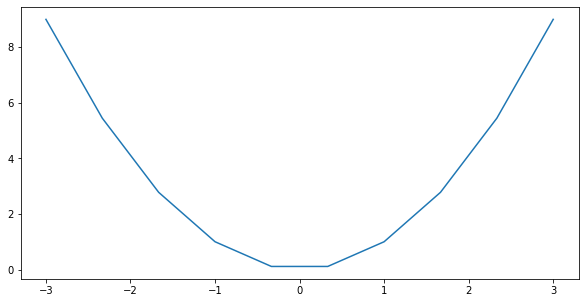

In [34]:
fig, axes = plt.subplots(figsize=(10, 5))
axes.plot(x, x**2)

## .savefig('パス')

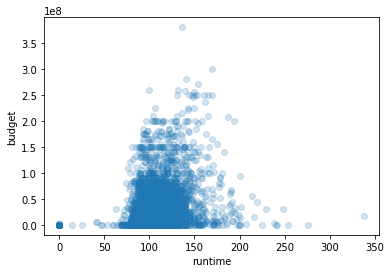

In [35]:
df = pd.read_csv('tmdb_5000_movies.csv')
plt.scatter('runtime', 'budget', data=df, alpha=0.2)
plt.xlabel('runtime')
plt.ylabel('budget')
plt.savefig('runtime_budget_scatter.png')

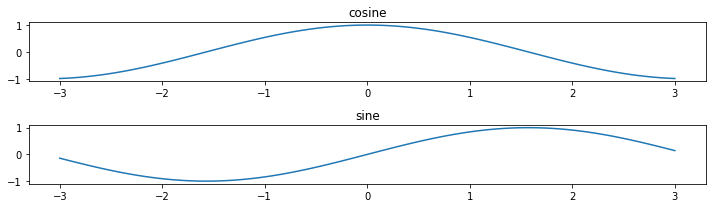

In [36]:
fig, axes = plt.subplots(2, 1, figsize=(10, 3))
x = np.linspace(-3, 3, 100)
axes[0].set_title('cosine')
axes[0].plot(x, np.cos(x))
axes[1].set_title('sine')
axes[1].plot(x, np.sin(x))
fig.tight_layout()
fig.savefig('cos_sin_.png')

## PDFで保存する

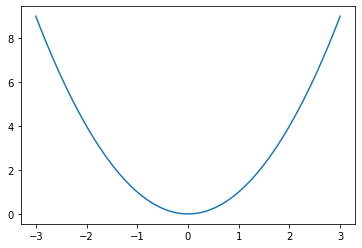

In [37]:
from matplotlib.backends.backend_pdf import PdfPages

pdf = PdfPages('pdf_files.pdf')

fig, axes = plt.subplots()
axes.plot(x, x**2)
pdf.savefig(fig)
pdf.close()

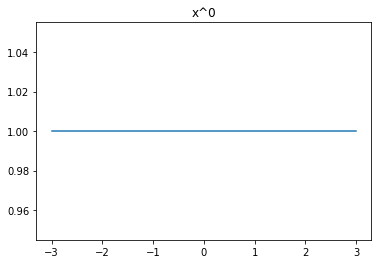

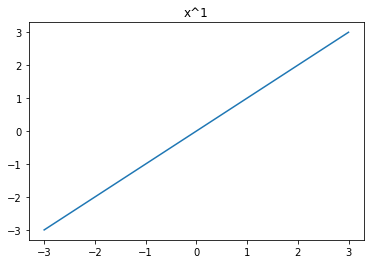

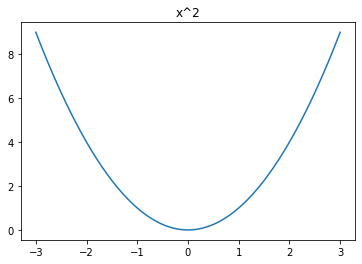

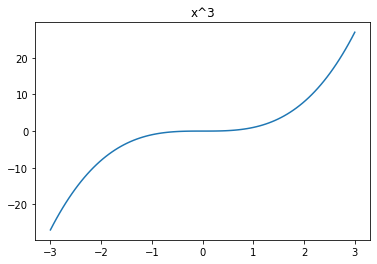

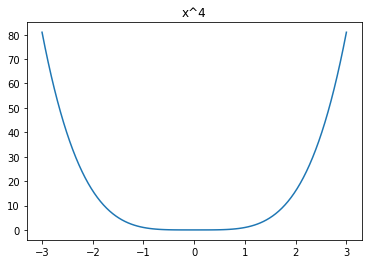

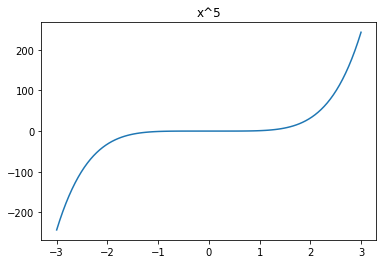

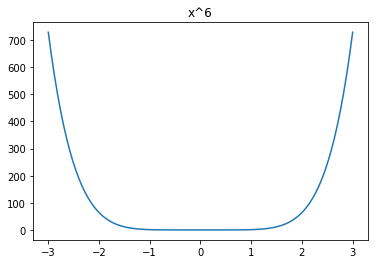

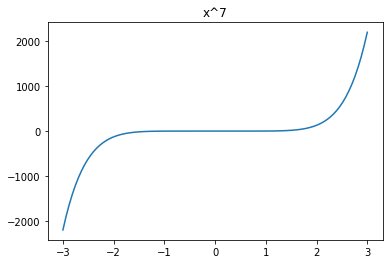

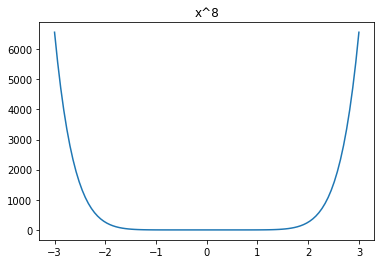

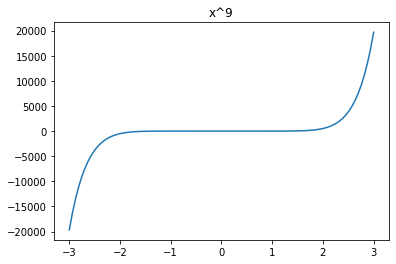

In [38]:
pdf = PdfPages('savemultifig_sample.pdf')
for i in range(10):
    fig, axes = plt.subplots()
    axes.plot(x, x**i)
    axes.set_title('x^{}'.format(i))
    pdf.savefig(fig)
pdf.close()

In [41]:
p = 2**3
p

8